Robust PCA
==========

This example demonstrates the use of class [rpca.RobustPCA](http://sporco.rtfd.org/en/latest/modules/sporco.admm.rpca.html#sporco.admm.rpca.RobustPCA) for solving a synthetic Robust PCA problem. A reference low-rank matrix is corrupted with a sparse set of outliers, and then recovered as the low-rank component of the Robust PCA decomposition into low-rank and sparse components.

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np
from scipy.ndimage.filters import gaussian_filter

from sporco.admm import rpca
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Generate example low-rank matrix. The smoothing using `gaussian_filter` is purely for visualization purposes: the Robust PCA recovery of the low-rank component works just as well without it, but the difference between corrupted and recovered matrices is less obvious without the smoothing.

In [2]:
N = 256
M = 5
np.random.seed(12345)
s0u = gaussian_filter(np.random.randn(N, M), 2.0)
s0v = gaussian_filter(np.random.randn(N, M), 2.0)
S0 = np.dot(s0u, s0v.T)

Corrupt approximately 25% of the samples of the the low-rank matrix.

In [3]:
s1gen = np.random.uniform(low=0.0, high=1.0, size=S0.shape)
S1 = S0.copy()
S1[s1gen > 0.75] = 0.0

Set options for the Robust PCA solver, create the solver object, and solve, returning the estimates of the low rank and sparse components ``X`` and ``Y``. Unlike most other SPORCO classes for optimisation problems, [rpca.RobustPCA](http://sporco.rtfd.org/en/latest/modules/sporco.admm.rpca.html#sporco.admm.rpca.RobustPCA) has a meaningful default regularization parameter, as used here.

In [4]:
opt = rpca.RobustPCA.Options({'Verbose': True, 'gEvalY': False,
                              'MaxMainIter': 200, 'RelStopTol': 5e-4,
                              'AutoRho': {'Enabled': True}})
b = rpca.RobustPCA(S1, None, opt)
X, Y = b.solve()

Itn   Fnc       NrmNuc    Nrmℓ1     Cnstr     r         s         ρ       
--------------------------------------------------------------------------
   0  1.72e+02  2.04e+01  2.42e+03  1.22e+01  4.38e-01  3.45e-01  2.25e-01


   1  1.44e+02  4.31e+01  1.61e+03  8.14e+00  2.86e-01  4.46e-01  2.25e-01
   2  1.59e+02  4.02e+01  1.90e+03  6.57e+00  1.99e-01  2.17e-01  1.80e-01


   3  1.32e+02  3.86e+01  1.50e+03  4.65e+00  1.49e-01  1.75e-01  1.80e-01
   4  1.30e+02  3.95e+01  1.45e+03  3.63e+00  1.15e-01  1.32e-01  1.80e-01


   5  1.32e+02  4.00e+01  1.47e+03  2.96e+00  9.05e-02  9.73e-02  1.80e-01
   6  1.25e+02  3.94e+01  1.37e+03  2.35e+00  7.37e-02  8.24e-02  1.80e-01


   7  1.24e+02  3.97e+01  1.35e+03  1.93e+00  6.06e-02  6.44e-02  1.80e-01
   8  1.24e+02  4.01e+01  1.35e+03  1.61e+00  4.97e-02  5.12e-02  1.80e-01
   9  1.22e+02  3.96e+01  1.31e+03  1.33e+00  4.14e-02  4.25e-02  1.80e-01
  10  1.21e+02  3.96e+01  1.31e+03  1.12e+00  3.48e-02  3.40e-02  1.80e-01
  11  1.21e+02  3.96e+01  1.30e+03  9.49e-01  2.94e-02  2.80e-02  1.80e-01


  12  1.20e+02  3.95e+01  1.29e+03  8.18e-01  2.54e-02  2.30e-02  1.80e-01
  13  1.20e+02  3.96e+01  1.28e+03  7.18e-01  2.23e-02  1.88e-02  1.80e-01
  14  1.20e+02  3.95e+01  1.28e+03  6.28e-01  1.95e-02  1.59e-02  1.80e-01
  15  1.19e+02  3.94e+01  1.28e+03  5.51e-01  1.71e-02  1.49e-02  1.99e-01
  16  1.19e+02  3.94e+01  1.28e+03  4.89e-01  1.52e-02  1.27e-02  1.99e-01


  17  1.19e+02  3.94e+01  1.27e+03  4.39e-01  1.36e-02  1.08e-02  1.99e-01
  18  1.19e+02  3.94e+01  1.27e+03  3.95e-01  1.22e-02  1.04e-02  2.24e-01
  19  1.19e+02  3.93e+01  1.27e+03  3.60e-01  1.12e-02  8.97e-03  2.24e-01
  20  1.19e+02  3.93e+01  1.27e+03  3.27e-01  1.02e-02  8.69e-03  2.50e-01
  21  1.19e+02  3.93e+01  1.27e+03  2.99e-01  9.29e-03  7.65e-03  2.50e-01


  22  1.19e+02  3.93e+01  1.27e+03  2.72e-01  8.44e-03  7.43e-03  2.76e-01
  23  1.19e+02  3.93e+01  1.27e+03  2.47e-01  7.67e-03  6.87e-03  2.76e-01
  24  1.18e+02  3.92e+01  1.27e+03  2.28e-01  7.06e-03  6.09e-03  2.76e-01
  25  1.18e+02  3.92e+01  1.27e+03  2.09e-01  6.48e-03  5.49e-03  2.76e-01
  26  1.18e+02  3.92e+01  1.27e+03  1.93e-01  5.97e-03  4.86e-03  2.76e-01


  27  1.18e+02  3.92e+01  1.27e+03  1.78e-01  5.53e-03  4.86e-03  3.06e-01
  28  1.18e+02  3.92e+01  1.27e+03  1.66e-01  5.15e-03  4.27e-03  3.06e-01
  29  1.18e+02  3.92e+01  1.27e+03  1.54e-01  4.79e-03  4.44e-03  3.36e-01
  30  1.18e+02  3.92e+01  1.27e+03  1.44e-01  4.46e-03  4.06e-03  3.36e-01
  31  1.18e+02  3.91e+01  1.27e+03  1.34e-01  4.15e-03  3.82e-03  3.36e-01


  32  1.18e+02  3.91e+01  1.27e+03  1.26e-01  3.91e-03  3.37e-03  3.36e-01
  33  1.18e+02  3.91e+01  1.27e+03  1.18e-01  3.67e-03  3.11e-03  3.36e-01
  34  1.18e+02  3.91e+01  1.27e+03  1.12e-01  3.46e-03  2.79e-03  3.36e-01
  35  1.18e+02  3.91e+01  1.27e+03  1.05e-01  3.26e-03  2.92e-03  3.74e-01
  36  1.18e+02  3.91e+01  1.27e+03  9.89e-02  3.07e-03  2.71e-03  3.74e-01


  37  1.18e+02  3.91e+01  1.27e+03  9.30e-02  2.88e-03  2.52e-03  3.74e-01
  38  1.18e+02  3.91e+01  1.27e+03  8.81e-02  2.73e-03  2.33e-03  3.74e-01
  39  1.18e+02  3.91e+01  1.27e+03  8.38e-02  2.60e-03  2.10e-03  3.74e-01
  40  1.18e+02  3.91e+01  1.27e+03  7.91e-02  2.45e-03  2.22e-03  4.17e-01
  41  1.18e+02  3.91e+01  1.26e+03  7.47e-02  2.32e-03  2.05e-03  4.17e-01


  42  1.18e+02  3.91e+01  1.26e+03  7.10e-02  2.20e-03  1.82e-03  4.17e-01
  43  1.18e+02  3.91e+01  1.26e+03  6.74e-02  2.09e-03  1.96e-03  4.58e-01
  44  1.18e+02  3.91e+01  1.26e+03  6.38e-02  1.98e-03  1.94e-03  4.58e-01
  45  1.18e+02  3.91e+01  1.26e+03  6.00e-02  1.86e-03  1.78e-03  4.58e-01
  46  1.18e+02  3.91e+01  1.26e+03  5.71e-02  1.77e-03  1.64e-03  4.58e-01


  47  1.18e+02  3.91e+01  1.26e+03  5.47e-02  1.69e-03  1.49e-03  4.58e-01
  48  1.18e+02  3.91e+01  1.26e+03  5.24e-02  1.62e-03  1.37e-03  4.58e-01
  49  1.18e+02  3.91e+01  1.26e+03  5.02e-02  1.56e-03  1.22e-03  4.58e-01
  50  1.18e+02  3.91e+01  1.26e+03  4.79e-02  1.49e-03  1.35e-03  5.17e-01


  51  1.18e+02  3.91e+01  1.26e+03  4.56e-02  1.41e-03  1.36e-03  5.17e-01
  52  1.18e+02  3.91e+01  1.26e+03  4.33e-02  1.34e-03  1.29e-03  5.17e-01
  53  1.18e+02  3.91e+01  1.26e+03  4.15e-02  1.29e-03  1.20e-03  5.17e-01
  54  1.18e+02  3.91e+01  1.26e+03  3.98e-02  1.23e-03  1.10e-03  5.17e-01
  55  1.18e+02  3.91e+01  1.26e+03  3.83e-02  1.19e-03  1.00e-03  5.17e-01


  56  1.18e+02  3.91e+01  1.26e+03  3.66e-02  1.14e-03  1.06e-03  5.17e-01
  57  1.18e+02  3.91e+01  1.26e+03  3.50e-02  1.08e-03  9.75e-04  5.17e-01
  58  1.18e+02  3.91e+01  1.26e+03  3.35e-02  1.04e-03  8.84e-04  5.17e-01
  59  1.18e+02  3.91e+01  1.26e+03  3.24e-02  1.00e-03  8.36e-04  5.17e-01
  60  1.18e+02  3.91e+01  1.26e+03  3.10e-02  9.60e-04  8.39e-04  5.17e-01


  61  1.18e+02  3.91e+01  1.26e+03  2.99e-02  9.27e-04  7.66e-04  5.17e-01
  62  1.18e+02  3.91e+01  1.26e+03  2.89e-02  8.95e-04  7.91e-04  5.69e-01
  63  1.18e+02  3.91e+01  1.26e+03  2.78e-02  8.63e-04  7.59e-04  5.69e-01
  64  1.18e+02  3.91e+01  1.26e+03  2.68e-02  8.32e-04  7.23e-04  5.69e-01
  65  1.18e+02  3.91e+01  1.26e+03  2.58e-02  8.01e-04  6.32e-04  5.69e-01


  66  1.18e+02  3.91e+01  1.26e+03  2.49e-02  7.72e-04  7.44e-04  6.41e-01
  67  1.18e+02  3.91e+01  1.26e+03  2.40e-02  7.45e-04  6.73e-04  6.41e-01
  68  1.18e+02  3.91e+01  1.26e+03  2.34e-02  7.24e-04  5.77e-04  6.41e-01
  69  1.18e+02  3.91e+01  1.26e+03  2.25e-02  6.98e-04  6.45e-04  7.18e-01
  70  1.18e+02  3.91e+01  1.26e+03  2.18e-02  6.74e-04  6.67e-04  7.18e-01


  71  1.18e+02  3.91e+01  1.26e+03  2.10e-02  6.52e-04  6.13e-04  7.18e-01
  72  1.18e+02  3.91e+01  1.26e+03  2.01e-02  6.24e-04  6.19e-04  7.18e-01
  73  1.18e+02  3.91e+01  1.26e+03  1.93e-02  5.98e-04  6.37e-04  7.18e-01
  74  1.18e+02  3.91e+01  1.26e+03  1.84e-02  5.69e-04  6.81e-04  7.18e-01
  75  1.18e+02  3.91e+01  1.26e+03  1.77e-02  5.49e-04  5.89e-04  7.18e-01


  76  1.18e+02  3.91e+01  1.26e+03  1.69e-02  5.24e-04  5.31e-04  7.18e-01
  77  1.18e+02  3.91e+01  1.26e+03  1.63e-02  5.06e-04  4.83e-04  7.18e-01
  78  1.18e+02  3.91e+01  1.26e+03  1.57e-02  4.86e-04  5.71e-04  7.18e-01
  79  1.18e+02  3.91e+01  1.26e+03  1.50e-02  4.65e-04  5.19e-04  7.18e-01
  80  1.18e+02  3.90e+01  1.26e+03  1.45e-02  4.51e-04  4.51e-04  7.18e-01
--------------------------------------------------------------------------


Display solve time and low-rank component recovery accuracy.

In [5]:
print("RobustPCA solve time:   %5.2f s" % b.timer.elapsed('solve'))
print("Low-rank component SNR: %5.2f dB" % metric.snr(S0, X))

RobustPCA solve time:    4.54 s
Low-rank component SNR: 69.18 dB


Display reference, corrupted, and recovered matrices.

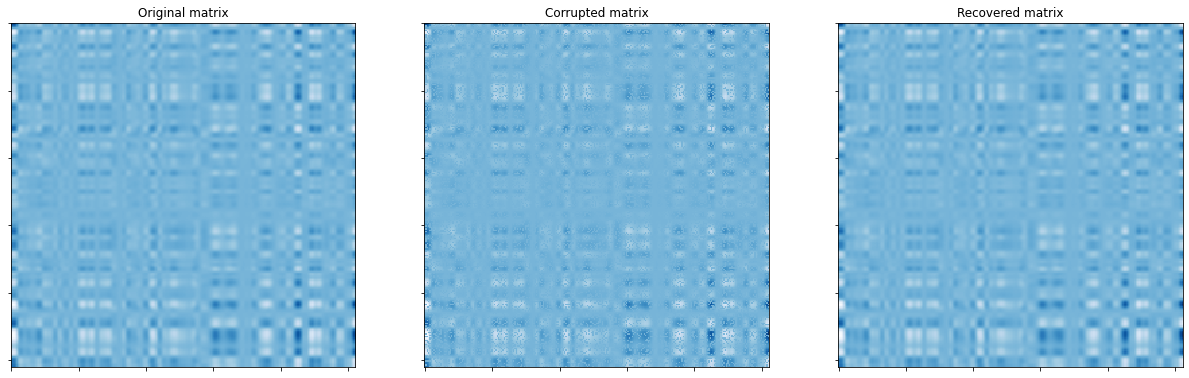

In [6]:
fig = plot.figure(figsize=(21, 7))
plot.subplot(1, 3, 1)
plot.imview(S0, cmap=plot.cm.Blues, title='Original matrix', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(S1, cmap=plot.cm.Blues, title='Corrupted matrix', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(X, cmap=plot.cm.Blues, title='Recovered matrix', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

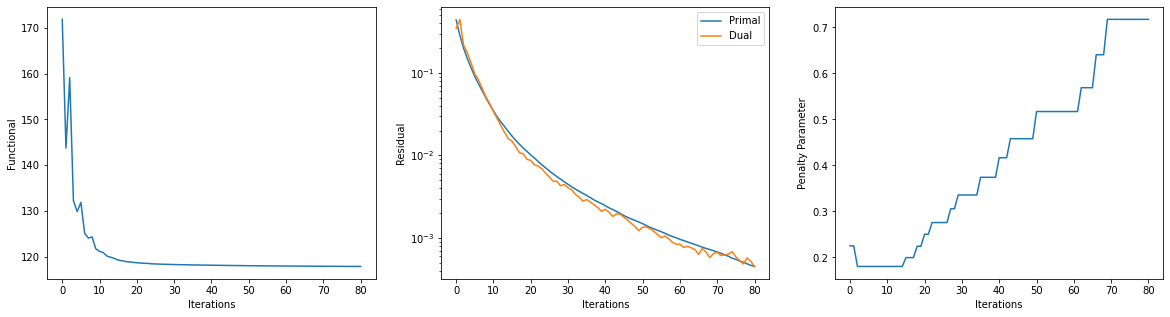

In [7]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()